<a href="https://colab.research.google.com/github/terry0809000/tensorflow22/blob/main/01_Neural_network_regression_in_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠 01_Neural_network_regression_in_Tensorflow

- Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
- Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
- Try and improve the results we got on the insurance dataset, some things you might want to try include:
    - Building a larger model (how does one with 4 dense layers go?).
    - Increasing the number of units in each layer.
    - Lookup the documentation of Adam and find out what the first parameter is,what happens if you increase it by 10x?
    - What happens if you train for longer (say 300 epochs instead of 200)?
- Import the Boston pricing dataset from TensorFlow `tf.keras.datasets` and model it.

In [13]:
import tensorflow as tf
import tensorflow_datasets as tfds

## 1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.




In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X , y  = make_regression(n_samples = 200 ,
                               n_features = 10 ,
                               n_targets = 1)

X.shape , y.shape

((200, 10), (200,))

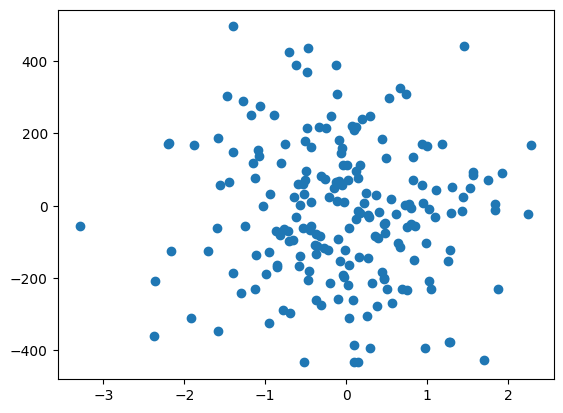

In [15]:
# Let's visualize the dataset

plt.scatter(X[:, 0] , y)

In [16]:
# Modelling our dummy data

# Set the random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae ,
              optimizer = tf.keras.optimizers.Adam() ,
              metrics = ['mae'])

# Fitting the model
model.fit(X , y , epochs = 10)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 155.5173 - mae: 155.5173  
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 155.5042 - mae: 155.5042  
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 155.4923 - mae: 155.4923 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 155.4804 - mae: 155.4804 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 155.4686 - mae: 155.4686 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 155.4568 - mae: 155.4568 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 155.4449 - mae: 155.4449 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 155.4331 - mae: 155.4331 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 155.4213 - mae: 155.4213 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 155.4094 - mae: 155.4094 


## 2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [17]:
# Building the model again with 4 Dense layers
tf.random.set_seed(42)

# Build the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10) ,
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss = tf.keras.losses.mae ,
              optimizer = tf.keras.optimizers.Adam() ,
              metrics = ['mae'])

# Fit the model
model.fit(X , y , epochs= 10)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 156.1797 - mae: 156.1797
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 155.9415 - mae: 155.9415 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 155.7382 - mae: 155.7382 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 155.5433 - mae: 155.5433 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 155.3521 - mae: 155.3521 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 155.1606 - mae: 155.1606 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 154.9648 - mae: 154.9648 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 154.7598 - mae: 154.7598 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 154.5403 - mae: 154.5403 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 154.3004 - mae: 154.3004 


Hmm..Seems the model isn't improving maybe running for more epochs would do the magic. But let's split this into train and test set to help our model to generalize well.

In [18]:
# Splitting the data into train and test splits
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 )

# Checking the shapes of our splitted data
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((160, 10), (160,), (40, 10), (40,))

In [19]:
# Let's build the model from scratch
tf.random.set_seed(42)

# Model 1 with one layer and fewer units
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ['mae'])

# Fit the model only our training data
model.fit(X_train , y_train , epochs = 100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 144.6049 - mae: 144.6049  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 144.3886 - mae: 144.3886 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 144.1472 - mae: 144.1472 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 143.8783 - mae: 143.8783 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 143.5780 - mae: 143.5780 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 143.2421 - mae: 143.2421 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 142.8657 - mae: 142.8657 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 142.4431 - mae: 142.4431 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 141.9680 - mae: 141.9680 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 141.4332 - mae: 141.4332 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 140.8307 - mae: 140.8307 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 140.1517 - mae: 140.1517


In [20]:
# Evaluating our model on the test data (unseen data)
model_1.evaluate(X_test , y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 159.9261 - mae: 159.9261 


[162.37039184570312, 162.37039184570312]

In [21]:
# Getting the predictions of our model
y_preds_1 = model_1.predict(X_test)
y_preds_1

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[ 0.7874814 ],
       [-0.25398088],
       [-1.1075478 ],
       [ 0.8479394 ],
       [ 0.36433703],
       [-0.22481668],
       [-0.13930982],
       [-1.6289178 ],
       [ 1.5795596 ],
       [ 0.830571  ],
       [-1.7615165 ],
       [ 1.2990783 ],
       [-0.03619492],
       [ 0.6583113 ],
       [-0.5996031 ],
       [ 0.97456   ],
       [ 0.3707903 ],
       [ 1.141082  ],
       [-0.05325007],
       [ 0.5401193 ],
       [-0.17325431],
       [ 0.0403083 ],
       [ 0.4078961 ],
       [-0.78788805],
       [ 1.575081  ],
       [-0.14118725],
       [ 1.604389  ],
       [ 0.67686605],
       [-1.4340134 ],
       [ 0.69142884],
       [ 3.379064  ],
       [ 1.8383858 ],
       [-1.2408998 ],
       [ 1.4614766 ],
       [ 0.7649695 ],
       [ 0.6389437 ],
       [-0.2614761 ],
       [ 1.3027889 ],
       [ 0.32029384],
       [ 0.07964849]], dtype=float32)

In [22]:
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

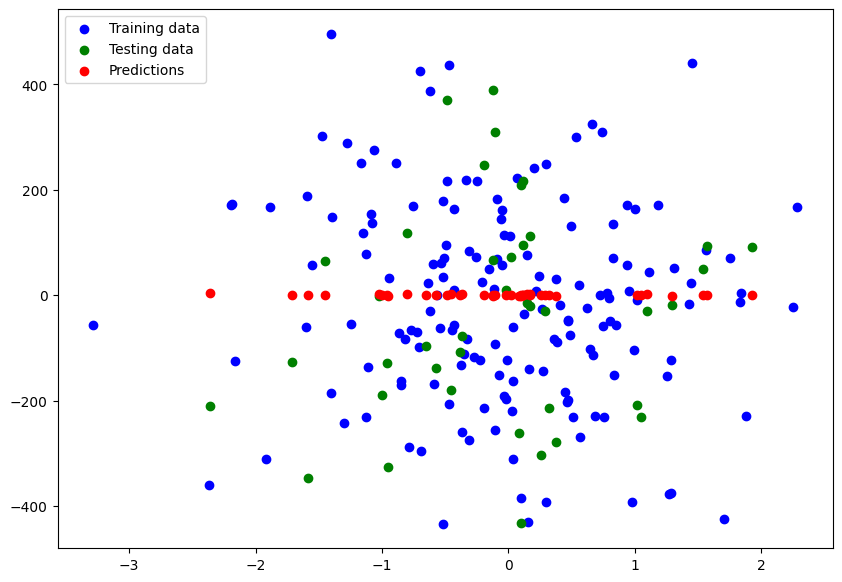

In [23]:
# Plotting our predictions with our target
plot_predictions(X_train[:,0] , y_train ,
                 X_test[:,0] , y_test , y_preds_1)

Great! Our model is trying to predict the points but it's not doing a great job with it.

Let's try couple of experiments and see how it goes.


In [24]:
# Building a model with 2 layers and fewer units
tf.random.set_seed(42)

# Build the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10) ,
  tf.keras.layers.Dense(1),
])

# Compile the model
model_2.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ['mae'])

# Fit the model
model_2.fit(X_train , y_train , epochs = 100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 145.2729 - mae: 145.2729  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 145.2265 - mae: 145.2265 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 145.1831 - mae: 145.1831 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 145.1396 - mae: 145.1396 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 145.0959 - mae: 145.0959 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 145.0516 - mae: 145.0516 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 145.0067 - mae: 145.0067 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 144.9610 - mae: 144.9610 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 144.9146 - mae: 144.9146 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 144.8672 - mae: 144.8672 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 144.8189 - mae: 144.8189 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 144.7695 - mae: 144.7695 


In [25]:
# Building our model with 3 layers and with more hidden units

tf.random.set_seed(42)

# Creating the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(50),
  tf.keras.layers.Dense(1) # Should be always one
])

# Compile the model
model_3.compile(loss = tf.keras.losses.mae ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ['mae'])

# Fit the model
model_3.fit(X_train , y_train , epochs = 100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 145.4701 - mae: 145.4701  
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 144.9977 - mae: 144.9977 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 144.5230 - mae: 144.5230 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 143.9984 - mae: 143.9984 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 143.3988 - mae: 143.3988 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 142.6983 - mae: 142.6983 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 141.8683 - mae: 141.8683 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 140.8769 - mae: 140.8769 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 139.6886 - mae: 139.6886 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 138.2639 - mae: 138.2639 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 136.5594 - mae: 136.5594 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 134.5278 - mae: 134.5278 


Woooo! Look at that, but we shouldn't be excited lets evaluate on the test data.

In [26]:
model_3.evaluate(X_test , y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4247 - mae: 0.4247 


[0.4282359182834625, 0.4282359182834625]

Awesome! This is what we want error should be loss. Let's plot our predictions with targets!

In [27]:
# Making predictions
y_preds_3 = model_3.predict(X_test)
y_preds_3.shape

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


(40, 1)

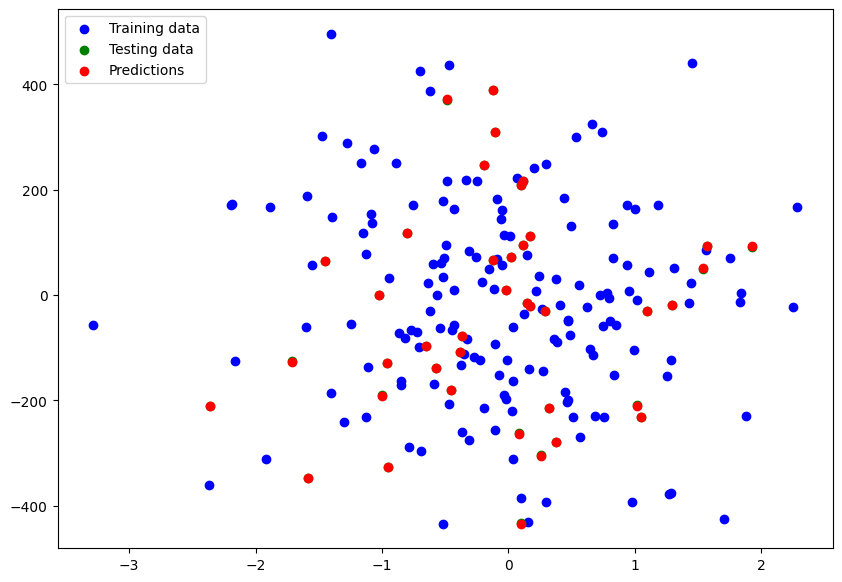

In [28]:
plot_predictions(X_train[: , 0] , y_train ,
                 X_test[: , 0] , y_test ,
                 y_preds_3)

Look at that! Our model has predicted every test data correctly. You can't spot a green dot (test data) it's because our predictions (red dot) overlapped.

Our model is doing a perfect job!

## Try and improve the results we got on the insurance dataset, some things you might want to try include:
- Building a larger model (how does one with 4 dense layers go?).
- Increasing the number of units in each layer.
- Lookup the documentation of Adam and find out what the first parameter is,what happens if you increase it by 10x?
- What happens if you train for longer (say 300 epochs instead of 200)?

### Building a larger model (how does one with 4 dense layers go?)

In [29]:
# Let's download the data
import pandas as pd
import numpy as np

data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

data.shape

(1338, 7)

Our insurance data has 1338 rows and 7 columns

In [30]:
# Looking into the data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We have some categorical variables, let's convert those columns into numerial used pandas.

In [31]:
# Turn categorical into numbers
data_one_hot = pd.get_dummies(data)
data_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [32]:
# Splitting into X and Y

X = data_one_hot.drop('charges' , axis = 1)
y = data_one_hot['charges']

X.shape , y.shape

((1338, 11), (1338,))

In [33]:
# Creating train and test split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

# Checking the shapes
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((1070, 11), (1070,), (268, 11), (268,))

In [34]:
# Building the model with 4 dense layers and more units

tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(300) ,
  tf.keras.layers.Dense(200),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(50) ,
  tf.keras.layers.Dense(1)
])


# Compiling the model
model.compile(loss = tf.keras.losses.mae ,
              optimizer = tf.keras.optimizers.Adam() ,
              metrics = ['mae'])

# Fit the model
model.fit(X_train , y_train , epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 12236.4062 - mae: 12236.4062
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7388.4639 - mae: 7388.4639
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7078.5913 - mae: 7078.5913
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6707.0684 - mae: 6707.0684
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6580.2861 - mae: 6580.2861
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6481.2485 - mae: 6481.2485
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6422.8174 - mae: 6422.8174
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6318.2017 - mae: 6318.2017
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6238.0342 - mae: 6238.0342
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6106.6113 - mae: 6106.6113
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5898.7295 - mae: 5898.7295
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

### Lookup the documentation of Adam and find out what the first parameter is,what happens if you increase it by 10x?

And running for 400 epochs

In [35]:
# Let's tweak the Adam Optimizer's learning rate

tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100) ,
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])


# Compiling the model
model.compile(loss = tf.keras.losses.mae ,
              optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001*10 ) ,
              metrics = ['mae'])

# Fit the model
history = model.fit(X_train , y_train , epochs = 400)

Epoch 1/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10156.4424 - mae: 10156.4424
Epoch 2/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6975.2466 - mae: 6975.2466 
Epoch 3/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6127.8955 - mae: 6127.8955
Epoch 4/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5284.9468 - mae: 5284.9468
Epoch 5/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4964.8188 - mae: 4964.8188
Epoch 6/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4245.7363 - mae: 4245.7363
Epoch 7/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3880.5486 - mae: 3880.5486 
Epoch 8/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3779.3567 - mae: 3779.3567 
Epoch 9/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3806.3535 - mae: 3806.3535 
Epoch 10/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4520.5801 - mae: 4520.5801 
Epoch 11/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4357.5342 - mae: 4357.5342
Epoch 12/400
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

In [36]:
# Evaluate on test data
model.evaluate(X_test , y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3264.6575 - mae: 3264.6575 


[3207.429931640625, 3207.429931640625]

Text(0.5, 0, 'Epochs')

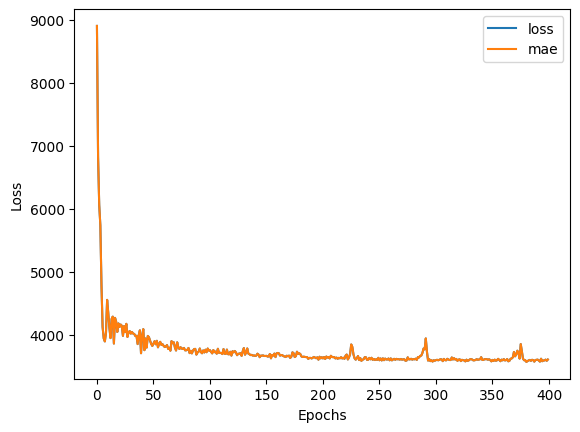

In [37]:
# Let's plot the loss curve Vs Epochs
pd.DataFrame(history.history).plot()
plt.ylabel('Loss')
plt.xlabel('Epochs')

Seems even increasing the learning rate and the number of epochs the model isn't performing an greater level.

## Import the Boston pricing dataset from TensorFlow `tf.keras.datasets` and model it.

In [38]:
# Getting the boston datasets from tensorflow datasets

(X_train , y_train) , (X_test , y_test) = tf.keras.datasets.boston_housing.load_data(path = 'boston_housing_npz' ,
                                                                           test_split = 0.2 , seed = 42)

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [39]:
# Checkin the shape of our data
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((404, 13), (102, 13), (404,), (102,))

This datasets is numpy array format and it's normalized.

In [40]:
# Let's build a model

tf.random.set_seed(42)

# Building a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(200),
  tf.keras.layers.Dense(200),
  tf.keras.layers.Dense(150),
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(1)
])


# Compile the model
model.compile(loss = tf.keras.losses.mae ,
              optimizer = tf.keras.optimizers.Adam() ,
              metrics = ['mae'])

# Fit the model
history = model.fit(X_train , y_train , epochs  = 300 )

Epoch 1/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 143.9346 - mae: 143.9346
Epoch 2/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.1102 - mae: 28.1102 
Epoch 3/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.6542 - mae: 8.6542   
Epoch 4/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.0544 - mae: 7.0544 
Epoch 5/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.1377 - mae: 8.1377 
Epoch 6/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.5476 - mae: 8.5476 
Epoch 7/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.8783 - mae: 7.8783 
Epoch 8/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.6933 - mae: 8.6933 
Epoch 9/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11.3598 - mae: 11.3598 
Epoch 10/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.5610 - mae: 7.5610 
Epoch 11/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.5545 - mae: 7.5545 
Epoch 12/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.9219 - mae: 6.9219 
Epoch 13/300
13/

In [41]:
# Let's evaluate on the test data
model.evaluate(X_test , y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0249 - mae: 3.0249  


[3.0343942642211914, 3.0343942642211914]

Text(0.5, 0, 'epochs')

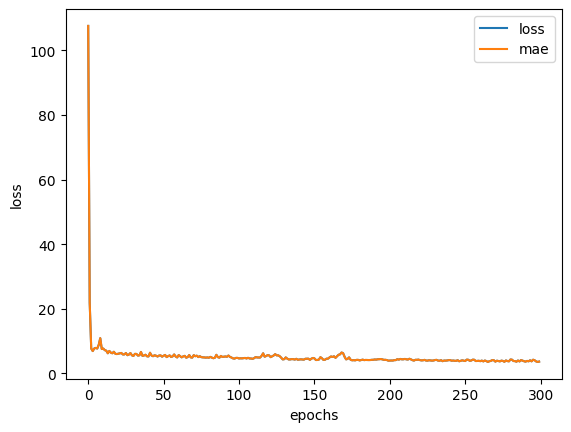

In [42]:
# Plotting the loss Vs Epoch
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

Alright we're done solving Exercise of the modeule Neural Network Regression with TensorFlow.